In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from numpy import mean


# Data Cleaning and EDA

In [331]:
all_data = pd.read_csv("Data_sorted_through_counties - Sheet3.csv")

all_data.head()

,State,County,% Adults with Obesity,Food Environment Index,% Physically Inactive,# Limited Access to Healthy Foods,% Frequent Physical Distress,% Frequent Mental Distress,% With Access to Exercise Opportunities,Life Expectancy,...,# Uninsured Adults,% Excessive Drinking,Unnamed: 13,Unnamed: 14,Unnamed: 15,STNAME,CTYNAME,POPESTIMATE2022,Unnamed: 19,TRUE
0,Alabama,NaN,39.0,5.3,28.0,418731.0,11.0,16.0,61.0,74.8,...,424832.0,16.0,NaN,NaN,NaN,Alabama,Alabama,5074296.0,NaN,False
1,Alabama,Autauga,37.0,6.6,26.0,7106.0,11.0,16.0,56.0,76.6,...,4434.0,17.0,NaN,NaN,NaN,Alabama,Autauga,59759.0,NaN,True
2,Alabama,Baldwin,33.0,7.5,23.0,14466.0,10.0,16.0,66.0,77.7,...,17707.0,19.0,NaN,NaN,NaN,Alabama,Baldwin,246435.0,NaN,True
3,Alabama,Barbour,46.0,5.8,36.0,2865.0,15.0,18.0,55.0,72.9,...,2169.0,13.0,NaN,NaN,NaN,Alabama,Barbour,24706.0,NaN,True
4,Alabama,Bibb,38.0,7.4,32.0,102.0,13.0,17.0,18.0,73.6,...,1937.0,16.0,NaN,NaN,NaN,Alabama,Bibb,22005.0,NaN,True


In [332]:
obesity_df = all_data[all_data["TRUE"] == True]
obesity_df.head()

,State,County,% Adults with Obesity,Food Environment Index,% Physically Inactive,# Limited Access to Healthy Foods,% Frequent Physical Distress,% Frequent Mental Distress,% With Access to Exercise Opportunities,Life Expectancy,...,# Uninsured Adults,% Excessive Drinking,Unnamed: 13,Unnamed: 14,Unnamed: 15,STNAME,CTYNAME,POPESTIMATE2022,Unnamed: 19,TRUE
1,Alabama,Autauga,37.0,6.6,26.0,7106.0,11.0,16.0,56.0,76.6,...,4434.0,17.0,NaN,NaN,NaN,Alabama,Autauga,59759.0,NaN,True
2,Alabama,Baldwin,33.0,7.5,23.0,14466.0,10.0,16.0,66.0,77.7,...,17707.0,19.0,NaN,NaN,NaN,Alabama,Baldwin,246435.0,NaN,True
3,Alabama,Barbour,46.0,5.8,36.0,2865.0,15.0,18.0,55.0,72.9,...,2169.0,13.0,NaN,NaN,NaN,Alabama,Barbour,24706.0,NaN,True
4,Alabama,Bibb,38.0,7.4,32.0,102.0,13.0,17.0,18.0,73.6,...,1937.0,16.0,NaN,NaN,NaN,Alabama,Bibb,22005.0,NaN,True
5,Alabama,Blount,33.0,7.8,29.0,1440.0,12.0,17.0,41.0,74.2,...,5607.0,16.0,NaN,NaN,NaN,Alabama,Blount,59512.0,NaN,True


In [333]:
# Drop columns that will not be used
obesity_df = obesity_df.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'STNAME', 'CTYNAME', 'Unnamed: 19', 'TRUE'], axis = 1)
obesity_df.head(5)

,State,County,% Adults with Obesity,Food Environment Index,% Physically Inactive,# Limited Access to Healthy Foods,% Frequent Physical Distress,% Frequent Mental Distress,% With Access to Exercise Opportunities,Life Expectancy,Median Household Income,# Uninsured Adults,% Excessive Drinking,POPESTIMATE2022
1,Alabama,Autauga,37.0,6.6,26.0,7106.0,11.0,16.0,56.0,76.6,66444.0,4434.0,17.0,59759.0
2,Alabama,Baldwin,33.0,7.5,23.0,14466.0,10.0,16.0,66.0,77.7,65658.0,17707.0,19.0,246435.0
3,Alabama,Barbour,46.0,5.8,36.0,2865.0,15.0,18.0,55.0,72.9,38649.0,2169.0,13.0,24706.0
4,Alabama,Bibb,38.0,7.4,32.0,102.0,13.0,17.0,18.0,73.6,48454.0,1937.0,16.0,22005.0
5,Alabama,Blount,33.0,7.8,29.0,1440.0,12.0,17.0,41.0,74.2,56894.0,5607.0,16.0,59512.0


In [334]:
obesity_df = obesity_df.dropna(axis = 0)

obesity_df.shape

(2968, 14)

Next up, we will change columns that include counts to percentages now that we have population data

In [335]:
obesity_df['# Limited Access to Healthy Foods'] = (obesity_df['# Limited Access to Healthy Foods'] / obesity_df['POPESTIMATE2022']) * 100

obesity_df['# Uninsured Adults'] = (obesity_df['# Uninsured Adults'] / obesity_df['POPESTIMATE2022']) * 100

obesity_df = obesity_df.rename(columns = {
    '# Limited Access to Healthy Foods':'% Limited Access to Healthy Foods',
    '# Uninsured Adults':'% Uninsured Adults'
})

obesity_df.shape

(2968, 14)

In [359]:

## Drop rows that contain percentages over 100
obesity_df = obesity_df[obesity_df['% Limited Access to Healthy Foods']  <= 100]

obesity_df = obesity_df[obesity_df['% Uninsured Adults'] <= 100]

obesity_df.shape


(2712, 14)

## Initial Plots

In [ ]:
fig, axes = plt.subplot(nrows = 2, ncols = 2)

[Text(0.5, 1.0, '% Adults with Obesity vs. Food Environment Index')]

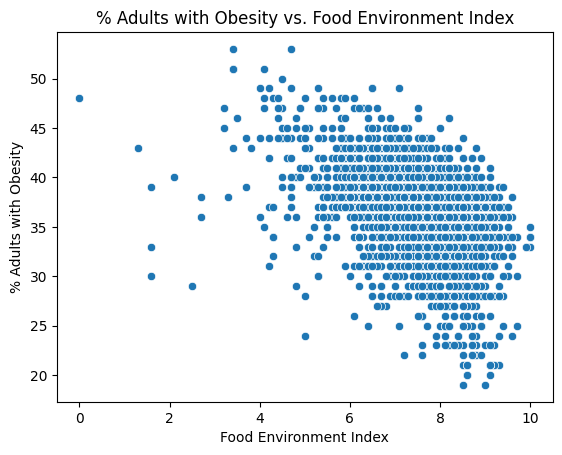

In [337]:
sns.scatterplot(data = obesity_df, x = 'Food Environment Index', y = '% Adults with Obesity').set(title = "% Adults with Obesity vs. Food Environment Index")


[Text(0.5, 1.0, '% Adults with Obesity vs. % Physically Inactive')]

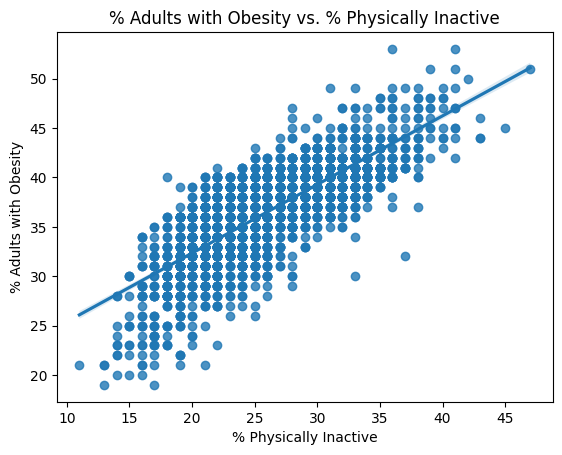

In [446]:
sns.regplot(data = obesity_df, x = '% Physically Inactive', y = '% Adults with Obesity').set(title = '% Adults with Obesity vs. % Physically Inactive')


<Axes: xlabel='% Limited Access to Healthy Foods', ylabel='% Adults with Obesity'>

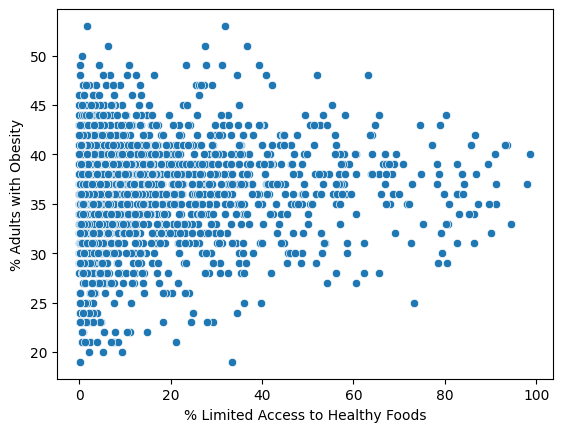

In [339]:
sns.scatterplot(data = obesity_df, x = '% Limited Access to Healthy Foods', y = '% Adults with Obesity')

<Axes: xlabel='% Frequent Physical Distress', ylabel='% Adults with Obesity'>

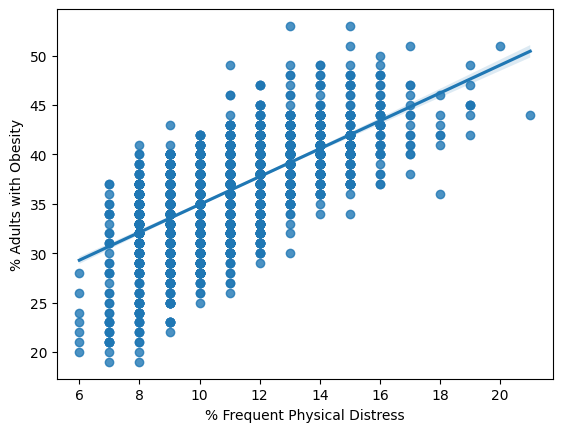

In [378]:
#sns.scatterplot(data = obesity_df, x = '% Frequent Physical Distress', y = '% Adults with Obesity', s = 5).set(title = "% Frequent Physical Distress vs. % Adults with Obesity")
sns.regplot(data = obesity_df, x = '% Frequent Physical Distress', y = '% Adults with Obesity')

[Text(0.5, 1.0, '% of Adults with Obesity on % Frequent Distress')]

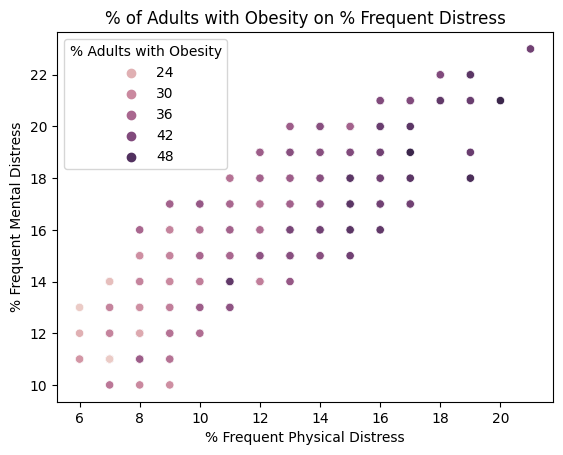

In [384]:
sns.scatterplot(data = obesity_df, x = '% Frequent Physical Distress', y = '% Frequent Mental Distress', hue = '% Adults with Obesity').set(title = "% of Adults with Obesity on % Frequent Distress")

[Text(0.5, 1.0, '% Adults with Obesity vs. % Frequent Physical Distress')]

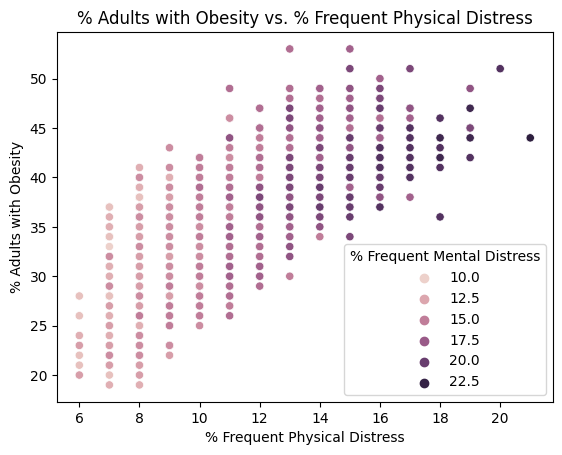

In [387]:
sns.scatterplot(data = obesity_df, x = '% Frequent Physical Distress', y = '% Adults with Obesity', hue = '% Frequent Mental Distress').set(
    title = "% Adults with Obesity vs. % Frequent Physical Distress"
)

<Axes: xlabel='% Frequent Physical Distress', ylabel='% Adults with Obesity'>

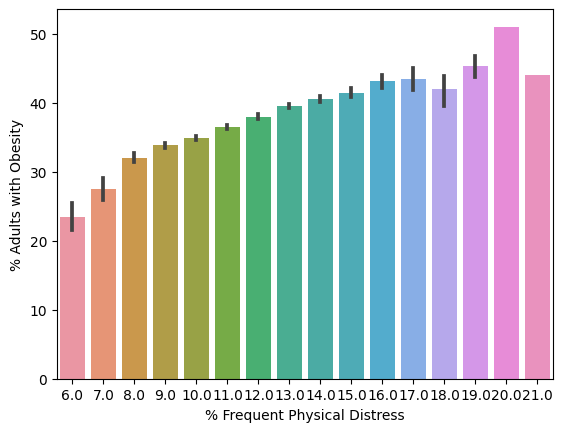

In [341]:
sns.barplot(data = obesity_df, x = '% Frequent Physical Distress', y = '% Adults with Obesity')

<Axes: xlabel='% Frequent Mental Distress', ylabel='% Adults with Obesity'>

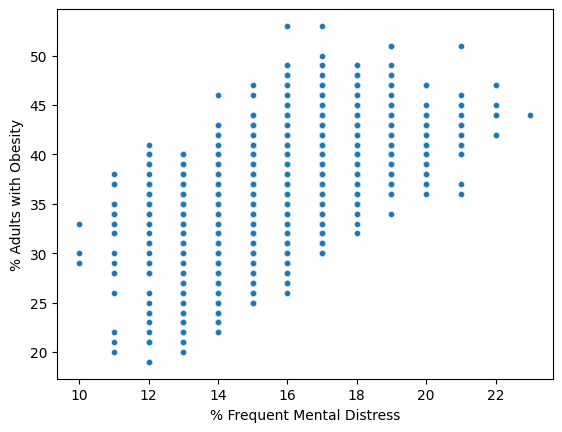

In [362]:
sns.scatterplot(data = obesity_df, x = '% Frequent Mental Distress', y = '% Adults with Obesity', s = 20).set

<Axes: xlabel='% Frequent Mental Distress', ylabel='% Adults with Obesity'>

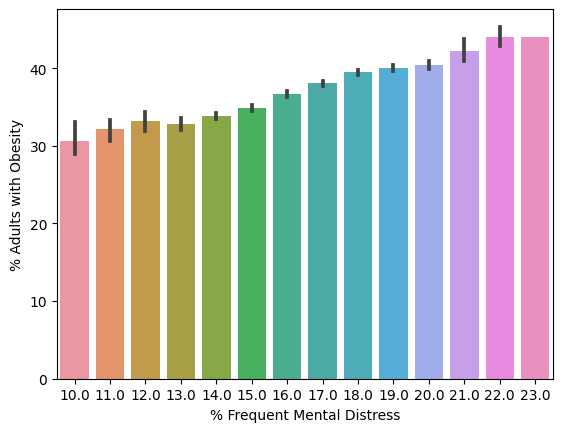

In [343]:
sns.barplot(data = obesity_df, x = '% Frequent Mental Distress', y = '% Adults with Obesity')

<Axes: xlabel='% With Access to Exercise Opportunities', ylabel='% Adults with Obesity'>

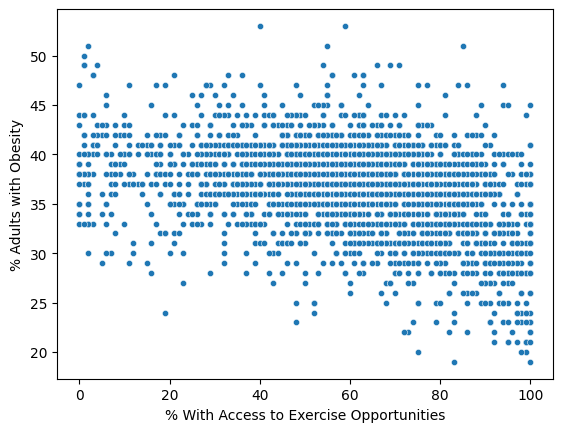

In [363]:
sns.scatterplot(data = obesity_df, x = '% With Access to Exercise Opportunities', y = '% Adults with Obesity', s = 20)

[Text(0.5, 1.0, '% Adults with Obesity vs. Life Expectancy')]

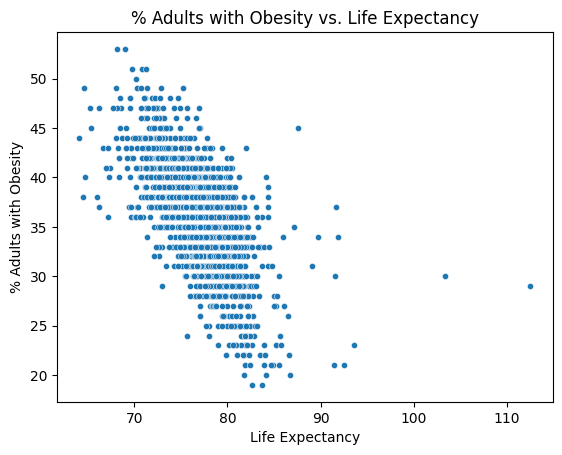

In [367]:
sns.scatterplot(data = obesity_df, x = 'Life Expectancy', y = '% Adults with Obesity', s = 20).set(title = "% Adults with Obesity vs. Life Expectancy")

<Axes: xlabel='Life Expectancy', ylabel='% Adults with Obesity'>

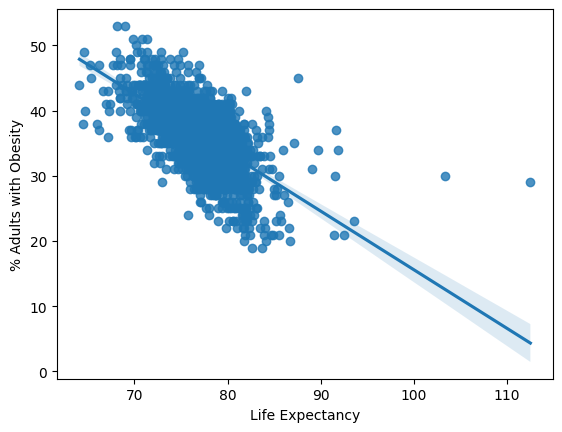

In [395]:
sns.regplot(data = obesity_df, x = 'Life Expectancy', y = '% Adults with Obesity')

The above plot shows that there are a few counties that have life expectancies over 100. This seems unusual, however, after further research the life expectanies of these counties is accurate. 

In [346]:
obesity_df[obesity_df['Life Expectancy'] > 100]

,State,County,% Adults with Obesity,Food Environment Index,% Physically Inactive,% Limited Access to Healthy Foods,% Frequent Physical Distress,% Frequent Mental Distress,% With Access to Exercise Opportunities,Life Expectancy,Median Household Income,% Uninsured Adults,% Excessive Drinking,POPESTIMATE2022
69,Alaska,Aleutians East,29.0,7.3,28.0,13.478517,9.0,10.0,11.0,112.5,71492.0,17.922307,16.0,3398.0
216,California,Mono,30.0,6.9,19.0,28.762778,10.0,15.0,70.0,103.3,70945.0,13.347433,23.0,8511.0


[Text(0.5, 1.0, '% Adults with Obesity vs. Median Household Income'),
 Text(0.5, 0, 'Median Household Income ($ Per Year)')]

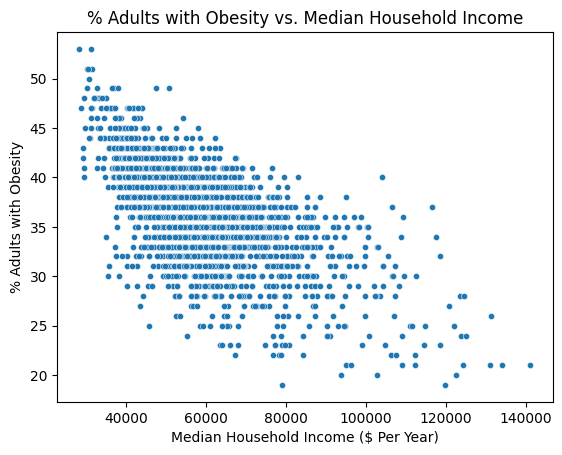

In [393]:
sns.scatterplot(data = obesity_df, x = 'Median Household Income', y = '% Adults with Obesity', s = 20, style = ).set(
    title = "% Adults with Obesity vs. Median Household Income",
    xlabel = 'Median Household Income ($ Per Year)'
)

<Axes: xlabel='% Uninsured Adults', ylabel='% Adults with Obesity'>

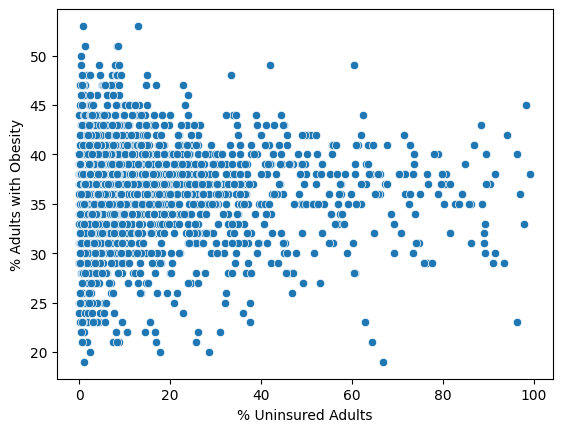

In [348]:
sns.scatterplot(data = obesity_df, x = '% Uninsured Adults', y = '% Adults with Obesity')

<Axes: xlabel='% Excessive Drinking', ylabel='% Adults with Obesity'>

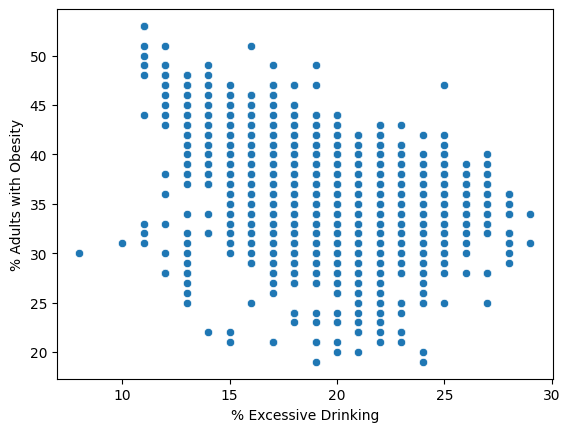

In [349]:
sns.scatterplot(data = obesity_df, x = '% Excessive Drinking', y = '% Adults with Obesity')

## Scatterplots containing multiple variables

[Text(0.5, 0, '% Frequent Distress'), Text(0, 0.5, '% Adults with Obesity')]

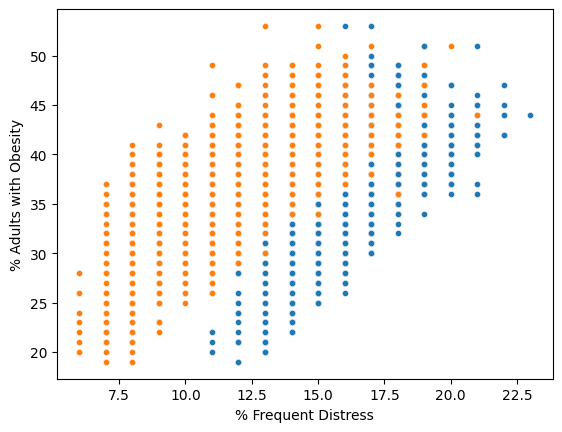

In [371]:
distress_scatter = sns.scatterplot(data = obesity_df, x = '% Frequent Mental Distress', y = '% Adults with Obesity', s = 20)

sns.scatterplot(data = obesity_df, x = '% Frequent Physical Distress', y = '% Adults with Obesity', s = 20).set(xlabel = "% Frequent Distress", ylabel = "% Adults with Obesity")

# Other Plots

### We'll begin with some maps

In [350]:
## Average obesity rate per state

States = list(obesity_df['State'].unique())
#print(States)
avg_obesity_rates = []


for state in States:
    obesity_rate = mean(obesity_df[obesity_df['State'] == state]['% Adults with Obesity'])
    avg_obesity_rates.append(obesity_rate)

avg_obesity_rates = list(avg_obesity_rates)

State_obesity_rates_df = pd.DataFrame(States, avg_obesity_rates)

State_obesity_rates_df.reset_index(inplace=True)

State_obesity_rates_df.columns = ['avg_obesity_rate', 'State']



#State_obesity_rates_df.head()

State_obesity_rates_df['Code'] = State_obesity_rates_df['State'].map({'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'})

State_obesity_rates_df.head()
    

,avg_obesity_rate,State,Code
0,41.045455,Alabama,AL
1,33.470588,Alaska,AK
2,33.500000,Arizona,AZ
3,39.140845,Arkansas,AR
4,30.127660,California,CA


In [351]:
fig = px.choropleth(State_obesity_rates_df, 
              locations = 'Code', 
              locationmode = "USA-states", 
              scope = "usa",
              color = 'avg_obesity_rate',
              color_continuous_scale="Viridis_r")

fig.update_layout(
      title_text = 'Average % of Adults with Obesity by State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
      
         )

fig.show()

# Linear Regression:

In [352]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [353]:
# Separate data into only the variables we will be using:

obesity_predictors = obesity_df[['Food Environment Index', '% Physically Inactive', '% Limited Access to Healthy Foods',
       '% Frequent Physical Distress', '% Frequent Mental Distress',
       '% With Access to Exercise Opportunities', 'Life Expectancy',
       'Median Household Income', '% Uninsured Adults', '% Excessive Drinking']]

obesity_rates = obesity_df[['% Adults with Obesity']]

obesity_rates

,% Adults with Obesity
1,37.0
2,33.0
3,46.0
4,38.0
5,33.0
...,...
3188,33.0
3189,20.0
3190,35.0
3191,30.0


In [354]:
# Create the Model

clf = LinearRegression()
clf.fit(obesity_predictors, obesity_rates)
print(clf.coef_)

[[ 3.69459285e-01  6.74911820e-01  3.58260684e-02 -4.62559804e-01
   7.17898407e-02 -1.57349841e-02 -2.56986101e-01 -4.83386293e-05
  -2.52574021e-02  5.88771389e-02]]


In [355]:
# Split data into training and testing data, we will use 8/2 testing to training ratio. 
X_train, X_test, y_train, y_test = train_test_split(obesity_predictors, obesity_rates, test_size = 0.2)

In [356]:
clf = LinearRegression()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

In [357]:
mean_absolute_error(preds, y_test)

2.035293030251937

The mean absolute error tells us that we were off by 2% on average! Is this good? IDK!

In [358]:
# R squared value
clf.score(X_train, y_train)

0.6594960271491088

According to our linear model, we can see that 66.7% of the variation in % Adults with obesity is explained by the obesity predictors

In [403]:
#plt.scatter(X_train, y_train, color = 'g')

X_train.shape
y_train.shape

(2169, 1)

/var/folders/py/rzg4jnbx5r1gb8scp179jq600000gn/T/ipykernel_66470/1093137244.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/var/folders/py/rzg4jnbx5r1gb8scp179jq600000gn/T/ipykernel_66470/1093137244.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

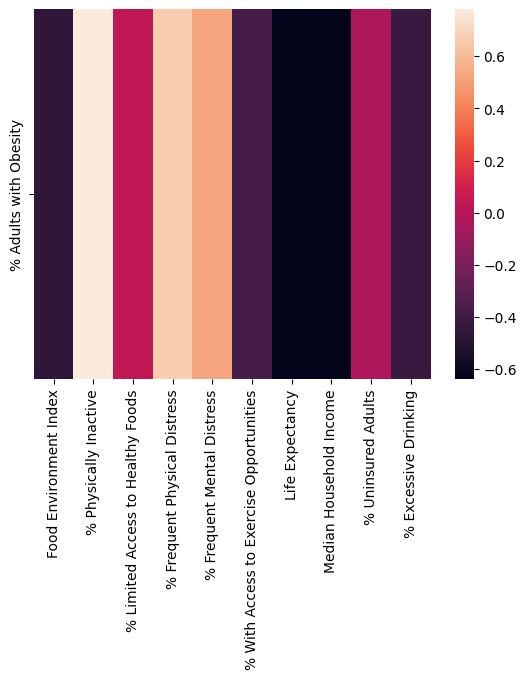

In [444]:
obesity_df.iloc[: , 0:13].corr().head(1)
sns.heatmap(data = (obesity_df.iloc[: , 0:13].corr().head(1).iloc[:, 1:13]))

In [442]:
obesity_df.iloc[: , 0:13].corr().head(1).iloc[:, 1:13]

/var/folders/py/rzg4jnbx5r1gb8scp179jq600000gn/T/ipykernel_66470/1542487736.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Food Environment Index,% Physically Inactive,% Limited Access to Healthy Foods,% Frequent Physical Distress,% Frequent Mental Distress,% With Access to Exercise Opportunities,Life Expectancy,Median Household Income,% Uninsured Adults,% Excessive Drinking
% Adults with Obesity,-0.459586,0.779757,0.037586,0.660429,0.52904,-0.376006,-0.636859,-0.630658,-0.032549,-0.421175


## Adjusted Linear Regression Model

In [434]:
# We will only use variables with a correlation of above 0.5 or below -0.5.

clf_adj = LinearRegression()
obesity_predictors_adj = obesity_df[['% Physically Inactive',
       '% Frequent Physical Distress', '% Frequent Mental Distress', 'Life Expectancy',
       'Median Household Income']]

obesity_rates = obesity_df[['% Adults with Obesity']]
clf_adj.fit(obesity_predictors_adj, obesity_rates)
print(clf_adj.coef_)
print(clf_adj.score(obesity_predictors_adj, obesity_rates))


[[ 6.82647657e-01 -6.29090390e-01  9.54138441e-02 -2.44241192e-01
  -5.40707996e-05]]
0.6456590265540217


Since the R squared value is basically unchanged, the adjusted model did not seem to improve.

In [437]:
X_train, X_test, y_train, y_test = train_test_split(obesity_predictors_adj, obesity_rates, test_size = 0.2)
clf_adj.fit(X_train, y_train)

preds = clf_adj.predict(X_test)

mean_absolute_error(preds, y_test)


1.9720704959744224

The mean absolute error is slightly smaller, indicating a better model. However, this different is not significant enough to declare that the new model is better. 

# Principal Component Analysis

In [457]:
obesity_numeric = obesity_df[['Food Environment Index', '% Physically Inactive', '% Limited Access to Healthy Foods',
       '% Frequent Physical Distress', '% Frequent Mental Distress',
       '% With Access to Exercise Opportunities', 'Life Expectancy',
       'Median Household Income', '% Uninsured Adults', '% Excessive Drinking']]

In [458]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(obesity_numeric)

scaled_data = scaler.transform(obesity_numeric)

pca = PCA(n_components=2)
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)
scaled_data.shape
x_pca.shape

(2712, 2)

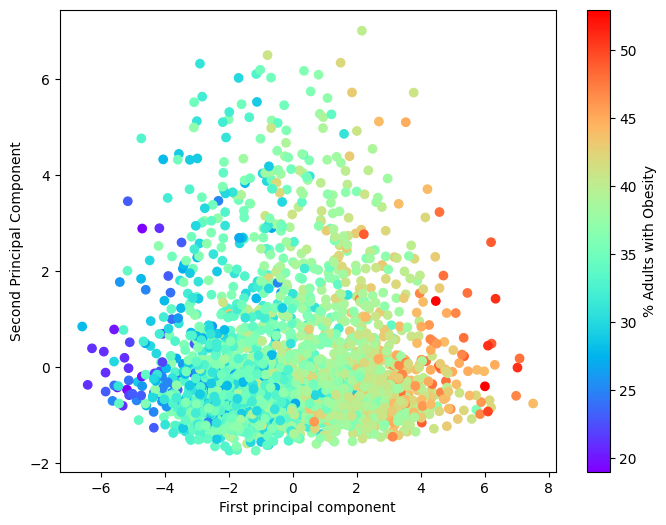

In [468]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c = obesity_df['% Adults with Obesity'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.colorbar(label = '% Adults with Obesity')

<Axes: >

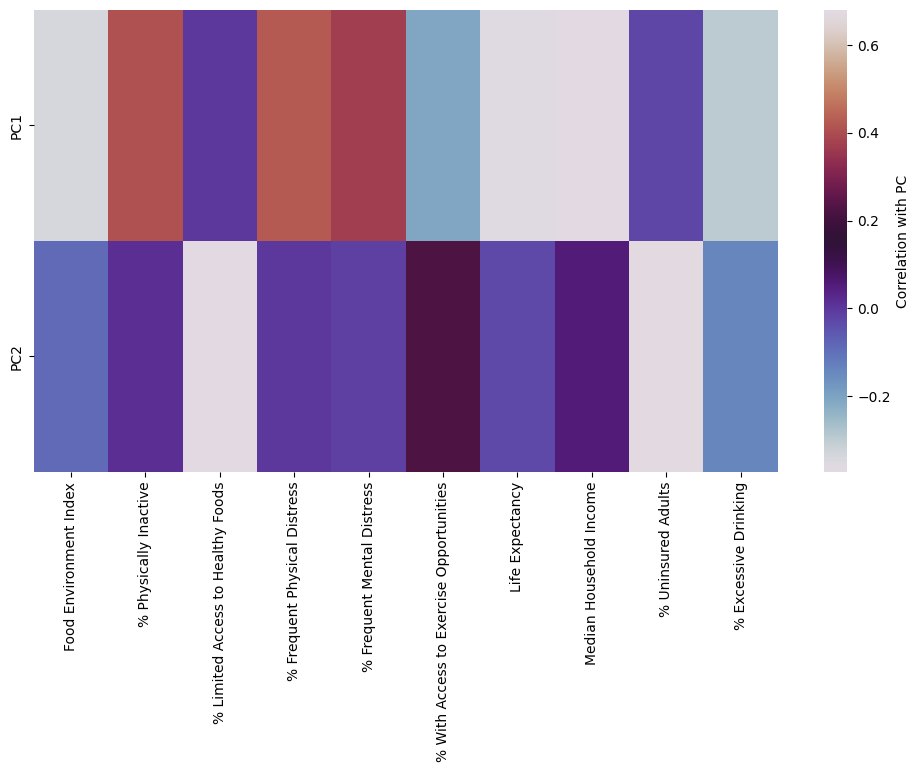

In [473]:
map= pd.DataFrame(pca.components_,columns = obesity_numeric.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight', yticklabels=['PC1', 'PC2'], cbar_kws = {'label' : 'Correlation with PC'})
